# 로지스틱 회귀

- 이진분류(Binary Classification)의 대표적인 알고리즘

## 1) 이진분류

![](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

- 알파벳의 S자 형태
    - H(x) = f(Wx + b) > f : 시그모이드 함수

## 2) 시그모이드 함수(Sigmoid function)

![](image/sigmoid.png)

- 최적의 W와 b를 찾아야하는 목표 (선형회귀와 같음)
- 시그모이드 함수의 출력값은 0과 1 사이의 값 > 특성을 이용하여 분류 작업에 사용
    - 출력값을 확률이라고 생각

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

- 시그모이드 함수 정의

In [6]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

- W가 1이고 b가 0인 그래프

In [8]:
# test
np.arange(-5.0, 5.0, 0.1).shape

(100,)

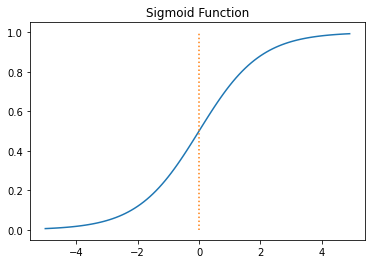

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)   # 1 * x + 0

plt.plot(x, y)
plt.plot([0,0],[0.0,1.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function')
plt.show()

### W값의 변화에 따른 경사도의 변화

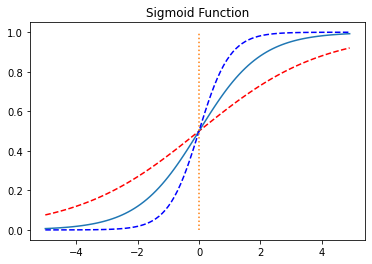

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)  # 0.5 * x
y2 = sigmoid(x)      # 1   * x
y3 = sigmoid(2*x)    # 2   * x

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2) # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[0.0,1.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function')
plt.show()

- W 값에 따라 그래프 경사도 변화
    - W : 그래프의 경사도를 결정
    - W 커지면 > 경사도 커지고, W 작아지면 경사도 작아짐

### b값의 변화에 따른 좌, 우 이동

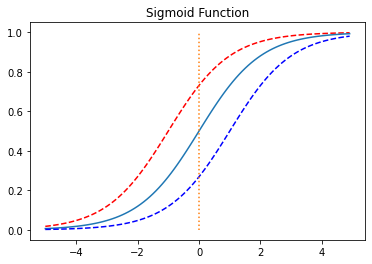

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+1)  # b = +1
y2 = sigmoid(x)
y3 = sigmoid(x-1)  # b = -1

plt.plot(x, y1, 'r', linestyle='--') 
plt.plot(x, y2) 
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[0.0,1.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function')
plt.show()

- x-1일 경우, x=1 일때 e^0 > 1 >> 0.5

## 3) 비용함수
- 시그모이드 함수를 반영한 비용함수를 미분하면 비볼록한 형태의 그래프 발생

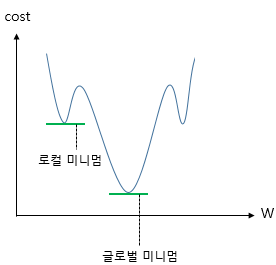

- 로컬 미니멈 문제로 인해 해당 비용함수는 목적에 맞지 않음

### 비용함수 재정의

- 시그모이드 함수의 특징은 함수의 출력값이 0과 1사이
    - 실제값이 1일 때 예측값이 0에 가까워지면 > 오차가 커져야 하며
    - 실제값이 0일 때, 예측값이 1에 가까워지면 > 오차가 커져야 합니다.
    
![](https://wikidocs.net/images/page/57805/%EA%B7%B8%EB%9E%98%ED%94%84.PNG)

- 실제값이 0일때 그래프 : 초록색 / 실제값이 1일때 그래프 : 주황색 

- 비용함수 - 로그함수 적용

![](image/sigmoid_cost1.png)

- 통합

![](image/sigmoid_cost2.png)

    - y = 1 > 우측항 없어짐 / y = 0 > 좌측항 없어짐
    
- 모든 오차의 평균
    - 실제값과 예측값 차이가 커지면 cost가 커지고
    - 차이가 작아지면 cost가 작아짐

![](image/sigmoid_cost3.png)

[참고] 로그함수 그래프 (출처) https://pythonkim.tistory.com/28

![](https://t1.daumcdn.net/cfile/tistory/271FFF50579B092516)

## 4) 파이토치로 로지스틱 회귀 구현하기

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
torch.manual_seed(1)

In [6]:
# 데이터

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [7]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [8]:
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [9]:
# 6 x 2 * 2 x 1 = 6 x 1 
# W와 b 선언

W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

![](image/sigmoid.png)

In [10]:
hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W)+b)))

In [11]:
# W와 b가 0인 상태에서 예측

print(hypothesis)  # 1 / 1 + e^0

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [12]:
#  torch.sigmoid
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [13]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


### cost 계산

In [14]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


- 하나의 샘플에 대한 오차 계산

![](image/sigmoid_cost2.png)

In [15]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

- 모든 원소에 대한 오차 계산

In [20]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

# ln 0.5 = -0.6931~ 

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


- 평균 계산

In [21]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


- 파이토치 비용함수 활용 : F.binary_cross_entropy(예측값, 실제값)

In [22]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

### 전체코드

In [24]:
# 데이터셋
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [25]:
# 가중치 및 편향
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 옵티마이져
optimizer = optim.SGD([W,b], lr=1)

# 에포크 지정
num_epochs = 1000

for epoch in range(num_epochs + 1):
    
    # 순전파
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # 역전파
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, num_epochs, cost.item()
                ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [26]:
print(W, b)

tensor([[3.2530],
        [1.5179]], requires_grad=True) tensor([-14.4819], requires_grad=True)


In [31]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [32]:
hypothesis >= torch.FloatTensor([0.5]) # 불리언

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [33]:
pred = hypothesis >= torch.FloatTensor([0.5]) # 불리언
print(pred)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [34]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## nn.Module로 구현하는 로지스틱 회귀

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
# 데이터
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [64]:
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


### nn.Sequential()

- nn.Module 층을 차례로 쌓을 수 있도록 합니다.
- 연결 개념

In [4]:
model = nn.Sequential(
    nn.Linear(2, 1),   # input_dim = 2, output_dim = 1
    nn.Sigmoid()       # 아웃풋이 시그모이드 함수를 거친다
)

In [7]:
# W와 b는 랜덤 초기화가 된 상태 : model.parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True),
 Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [11]:
model(x_train), model(x_train).shape

(tensor([[0.4020],
         [0.4147],
         [0.6556],
         [0.5948],
         [0.6788],
         [0.8061]], grad_fn=<SigmoidBackward0>),
 torch.Size([6, 1]))

In [12]:
# 학습 : 경사하강법

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 10번마다 로그 출력
    if epoch % 10 == 0:
        
        # 예측값 - 실제값
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        
        # 정확도
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [25]:
# 기존 훈련데이터 입력
torch.round(model(x_train), decimals=3)

tensor([[0.0000],
        [0.0320],
        [0.0390],
        [0.9560],
        [0.9980],
        [1.0000]], grad_fn=<RoundBackward1>)

In [28]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


[참고]
인공신경망으로 표현

![](https://wikidocs.net/images/page/58686/logistic_regression.PNG)

## 클래스로 파이토치 모델 구현하기

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [31]:
torch.manual_seed(1)

In [34]:
# 클래스 구현
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()  # 상속
    self.linear = nn.Linear(2, 1)  # input 2 / output 1
    self.sigmoid = nn.Sigmoid()
  
  def forward(self, x):
    return self.sigmoid(self.linear(x))  # sigmoid(linear)

In [35]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [36]:
model = BinaryClassifier()

In [37]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)  # model.parameters()

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [38]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]
